In [30]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-approval-prediction/credit_record.csv
/kaggle/input/credit-card-approval-prediction/application_record.csv


In [31]:
df = pd.read_csv("../input/credit-card-approval-prediction/application_record.csv")

In [32]:
df_label = pd.read_csv("../input/credit-card-approval-prediction/credit_record.csv")

In [33]:
df_label

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [34]:
df_label.groupby('ID')['STATUS'].count()

ID
5001711     4
5001712    19
5001713    22
5001714    15
5001715    60
           ..
5150482    18
5150483    18
5150484    13
5150485     2
5150487    30
Name: STATUS, Length: 45985, dtype: int64

In [35]:
df_label['STATUS'], labels = pd.factorize(df_label['STATUS'])

In [36]:
labels

Index(['X', '0', 'C', '1', '2', '3', '4', '5'], dtype='object')

In [37]:
df_label_clean = df_label[df_label['STATUS'] != 0]

In [38]:
df_label_clean['STATUS'][df_label['STATUS'] > 2] = 10

/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:992: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)


In [39]:
df_label_clean['STATUS'][df_label['STATUS'] <= 2] = 0

/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:992: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)


In [40]:
df_label_clean.groupby('STATUS')['STATUS'].count()

STATUS
0     825151
10     14194
Name: STATUS, dtype: int64

In [41]:
df_label_group = df_label_clean.groupby('ID').mean()

In [42]:
df_label_group['STATUS'][df_label_group['STATUS'] > 0] = 1
df_label_group['STATUS'][df_label_group['STATUS'] <= 0] = 0

In [43]:
df_label_group.groupby('STATUS')['STATUS'].count()

STATUS
0.0    36099
1.0     5350
Name: STATUS, dtype: int64

In [44]:
df_label_group

,MONTHS_BALANCE,STATUS
ID,,
5001711,-2.000000,0.0
5001712,-9.000000,0.0
5001717,-10.500000,0.0
5001718,-18.724138,1.0
5001719,-21.000000,0.0
...,...,...
5150480,-36.500000,0.0
5150482,-19.500000,0.0
5150484,-6.000000,0.0


In [45]:
client_id = df_label_group.index.values
client_label = df_label_group['STATUS'].values

In [46]:
df.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [47]:
df.isnull().any()

ID                     False
CODE_GENDER            False
FLAG_OWN_CAR           False
FLAG_OWN_REALTY        False
CNT_CHILDREN           False
AMT_INCOME_TOTAL       False
NAME_INCOME_TYPE       False
NAME_EDUCATION_TYPE    False
NAME_FAMILY_STATUS     False
NAME_HOUSING_TYPE      False
DAYS_BIRTH             False
DAYS_EMPLOYED          False
FLAG_MOBIL             False
FLAG_WORK_PHONE        False
FLAG_PHONE             False
FLAG_EMAIL             False
OCCUPATION_TYPE         True
CNT_FAM_MEMBERS        False
dtype: bool

In [48]:
df.groupby('OCCUPATION_TYPE')['OCCUPATION_TYPE'].count()

OCCUPATION_TYPE
Accountants              15985
Cleaning staff            5845
Cooking staff             8076
Core staff               43007
Drivers                  26090
HR staff                   774
High skill tech staff    17289
IT staff                   604
Laborers                 78240
Low-skill Laborers        2140
Managers                 35487
Medicine staff           13520
Private service staff     3456
Realty agents             1041
Sales staff              41098
Secretaries               2044
Security staff            7993
Waiters/barmen staff      1665
Name: OCCUPATION_TYPE, dtype: int64

In [49]:
df_clean = df.dropna(axis = 0)

In [50]:
df_clean.isnull().any()

ID                     False
CODE_GENDER            False
FLAG_OWN_CAR           False
FLAG_OWN_REALTY        False
CNT_CHILDREN           False
AMT_INCOME_TOTAL       False
NAME_INCOME_TYPE       False
NAME_EDUCATION_TYPE    False
NAME_FAMILY_STATUS     False
NAME_HOUSING_TYPE      False
DAYS_BIRTH             False
DAYS_EMPLOYED          False
FLAG_MOBIL             False
FLAG_WORK_PHONE        False
FLAG_PHONE             False
FLAG_EMAIL             False
OCCUPATION_TYPE        False
CNT_FAM_MEMBERS        False
dtype: bool

In [52]:
df.groupby('NAME_HOUSING_TYPE')['NAME_HOUSING_TYPE'].count()

NAME_HOUSING_TYPE
Co-op apartment          1539
House / apartment      393831
Municipal apartment     14214
Office apartment         3922
Rented apartment         5974
With parents            19077
Name: NAME_HOUSING_TYPE, dtype: int64

In [53]:
df_clean_drop = df_clean.drop(['DAYS_BIRTH', 'FLAG_EMAIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_MOBIL'], axis = 1)

In [54]:
df_clean_drop.isnull().any()

ID                     False
CODE_GENDER            False
FLAG_OWN_CAR           False
FLAG_OWN_REALTY        False
CNT_CHILDREN           False
AMT_INCOME_TOTAL       False
NAME_INCOME_TYPE       False
NAME_EDUCATION_TYPE    False
NAME_FAMILY_STATUS     False
NAME_HOUSING_TYPE      False
DAYS_EMPLOYED          False
OCCUPATION_TYPE        False
CNT_FAM_MEMBERS        False
dtype: bool

In [ ]:
#df_clean_drop = df_clean_drop.drop(['ID'], axis = 1)

In [55]:
df_clean_drop = df_clean_drop.drop(['CODE_GENDER'], axis = 1)

In [56]:
df_clean_drop.isnull().any()

ID                     False
FLAG_OWN_CAR           False
FLAG_OWN_REALTY        False
CNT_CHILDREN           False
AMT_INCOME_TOTAL       False
NAME_INCOME_TYPE       False
NAME_EDUCATION_TYPE    False
NAME_FAMILY_STATUS     False
NAME_HOUSING_TYPE      False
DAYS_EMPLOYED          False
OCCUPATION_TYPE        False
CNT_FAM_MEMBERS        False
dtype: bool

In [57]:
df_clean_drop.dtypes

ID                       int64
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_EMPLOYED            int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
dtype: object

In [58]:
df_clean_drop['FLAG_OWN_CAR'] = pd.factorize(df_clean_drop['FLAG_OWN_CAR'])[0]
df_clean_drop['FLAG_OWN_REALTY'] = pd.factorize(df_clean_drop['FLAG_OWN_REALTY'])[0]
df_clean_drop['NAME_INCOME_TYPE'] = pd.factorize(df_clean_drop['NAME_INCOME_TYPE'])[0]
df_clean_drop['NAME_EDUCATION_TYPE'] = pd.factorize(df_clean_drop['NAME_EDUCATION_TYPE'])[0]
df_clean_drop['NAME_FAMILY_STATUS'] = pd.factorize(df_clean_drop['NAME_FAMILY_STATUS'])[0]
df_clean_drop['NAME_HOUSING_TYPE'] = pd.factorize(df_clean_drop['NAME_HOUSING_TYPE'])[0]
df_clean_drop['OCCUPATION_TYPE'] = pd.factorize(df_clean_drop['OCCUPATION_TYPE'])[0]

In [59]:
df_clean_drop.dtypes

ID                       int64
FLAG_OWN_CAR             int64
FLAG_OWN_REALTY          int64
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE         int64
NAME_EDUCATION_TYPE      int64
NAME_FAMILY_STATUS       int64
NAME_HOUSING_TYPE        int64
DAYS_EMPLOYED            int64
OCCUPATION_TYPE          int64
CNT_FAM_MEMBERS        float64
dtype: object

In [60]:
X_clien_id = df_clean_drop['ID'].values
df_clean_drop = df_clean_drop.drop(['ID'], axis = 1)

In [61]:
X = df_clean_drop.values
X.shape

(304354, 11)

In [62]:
real_client_id = np.array([item for item in X_clien_id if item in client_id])

In [63]:
y = np.array([client_label[client_id == item][0] for item in real_client_id])

In [64]:
X_final = [X[X_clien_id == item, :][0] for item in real_client_id]

In [65]:
X_real_final = np.vstack(X_final)

In [66]:
X_real_final.shape

(22737, 11)

In [67]:
len(y)

22737

In [68]:
sum(y==0)

19648

In [69]:
sum(y==1)

3089

In [70]:
3089/ (19648 + 3089)

0.1358578528389849

In [71]:
from imblearn.under_sampling import RandomUnderSampler
sm = RandomUnderSampler(random_state=1)
X_res, y_res = sm.fit_resample(X_real_final, y)

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=1)

In [73]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [74]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X_train)
X_train_norm =  scaler.transform(X_train)
X_val_norm = scaler.transform(X_val)
X_test_norm = scaler.transform(X_test)

In [87]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV

params = {'n_estimators' : [10,50,100,200,500]}
clf = GridSearchCV(BaggingClassifier(random_state=0,),params, cv=10)
clf.fit(X_train_norm, y_train)
print("Best params : " + str(clf.best_params_))
print("10CV accuracy : "+str(clf.best_score_*100))

Best params : {'n_estimators': 200}
10CV accuracy : 63.36951796445467


In [88]:
y_predict = clf.predict(X_test_norm)
print("Test accuracy : "+str(sum(y_test == y_predict)/len(y_test)*100))

Test accuracy : 67.79935275080906


In [89]:
import tensorflow as tf

In [90]:
def create_model():
    tf.random.set_seed(0)
    tf.compat.v1.reset_default_graph() # Clear Model

    model = tf.keras.models.Sequential([
      tf.keras.layers.Dense(100, activation='relu', input_shape=(11,)),
      tf.keras.layers.Dense(50, activation='relu'),
      tf.keras.layers.Dense(25, activation='relu'),
      tf.keras.layers.Dense(5, activation='relu'),
      tf.keras.layers.Dense(3, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')    
    ])
    return model

In [91]:
model = create_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [92]:
train_acc = list()
val_acc = list()
for i in range(0,500):
  history = model.fit(X_train_norm, y_train, epochs= 1, batch_size = 200, validation_data= (X_val_norm, y_val))
  tmp_avg = np.mean(history.history['accuracy'])
  tmp_avg_val = np.mean(history.history['val_accuracy'])
  train_acc.append(tmp_avg)
  val_acc.append(tmp_avg_val)

20/20 [==============================] - 0s 7ms/step - loss: 0.4603 - accuracy: 0.7827 - val_loss: 0.9982 - val_accuracy: 0.6198


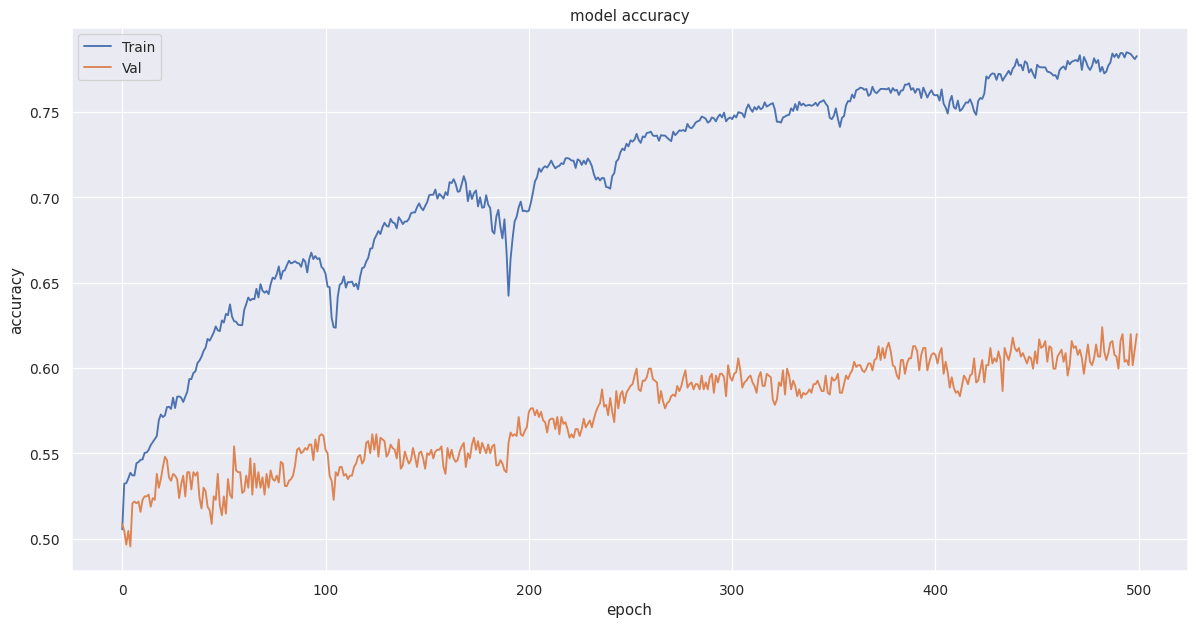

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.figure(num=None, figsize=(16, 8), dpi=90, facecolor='w', edgecolor='k')
plt.plot()
plt.plot(train_acc)
plt.plot(val_acc)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [94]:
y_predict = np.round(model.predict(X_test_norm)) 
y_predict = np.array([i[0] for i in y_predict.tolist()])
print("Test accuracy : "+str(sum(y_predict == y_test)/len(y_test)*100))

Test accuracy : 62.86407766990292


In [95]:
model = create_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [96]:
train_acc = list()
val_acc = list()
for i in range(0,100):
  history = model.fit(X_train_norm, y_train, epochs= 1, batch_size = 200, validation_data= (X_val_norm, y_val))
  tmp_avg = np.mean(history.history['accuracy'])
  tmp_avg_val = np.mean(history.history['val_accuracy'])
  train_acc.append(tmp_avg)
  val_acc.append(tmp_avg_val)

20/20 [==============================] - 0s 7ms/step - loss: 0.6175 - accuracy: 0.6580 - val_loss: 0.7101 - val_accuracy: 0.5602


In [97]:
y_predict = np.round(model.predict(X_test_norm))
y_predict = np.array([i[0] for i in y_predict.tolist()])
sum(y_predict == y_test)/len(y_test)

0.5841423948220065